In [222]:
%load_ext autoreload
%autoreload 2
from utils.module.UNet_v2 import *
from utils.module.datasets import Image_dataset
from utils.module.train import Train
from utils.module.postprocessing import Postprocessing
from torchvision.transforms import v2
import numpy as np

dataset = Image_dataset(r'data\train_image',r'data\train_mask',transform=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


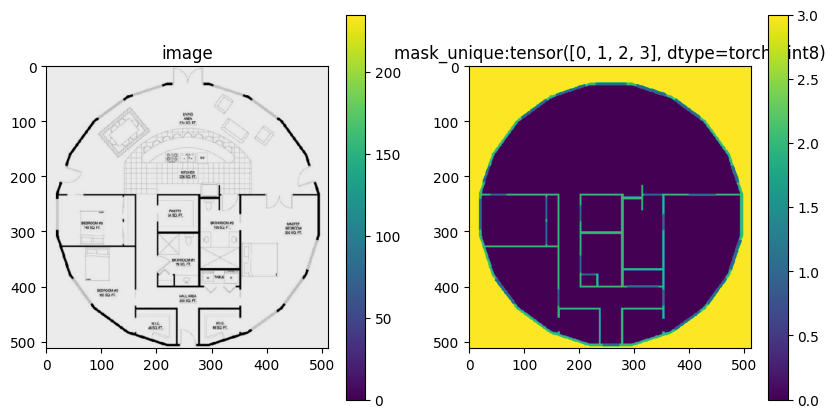

d:\Folder\Vscode\Git\Airflow organization prediction\utils\module\UNet_v2.py:69: UserWarning: please provide the pretrained pvt model. Not using pretrained model.
  warnings.warn('please provide the pretrained pvt model. Not using pretrained model.')


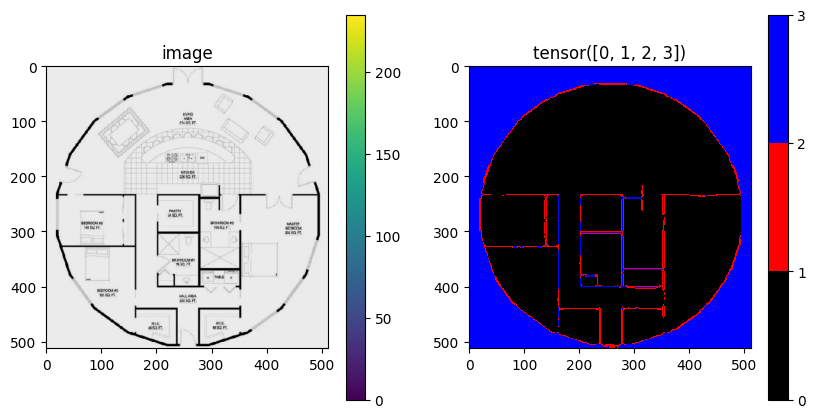

In [223]:
# image = Image.open('test.jpg')
# image = v2.ToImage()(image).float()
# image = v2.Resize((512,512),antialias=True)(image)
image = dataset.show_image(1).float()

n_classes = 4
pretrained_path = r'C:\Users\Administrator\Desktop\Code\U-Net_v2-master\pvt_v2_b2.pth'
model = UNetV2(n_classes=n_classes, deep_supervision=True ,pretrained_path=None)
train = Train(dataset=dataset,model=model,lr=1e-4,weight_decay=1e-4,alpha=0.01,batch_size=1)
masks = train.predict_show(image,model_path=r'result\best-0.97.pth')
# train.predict_show(image,model_path=r'result\188-0.84.pth')

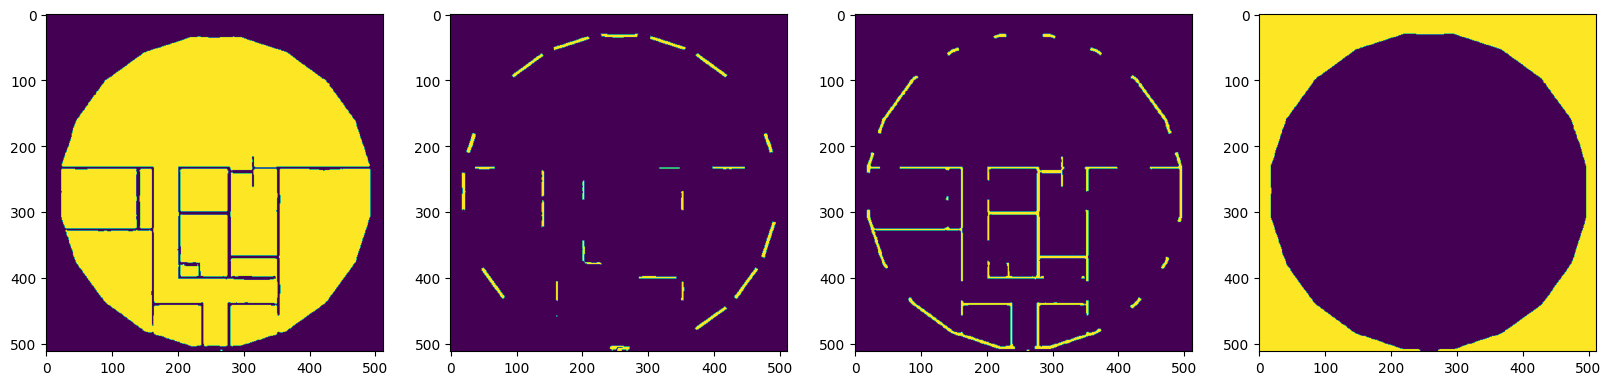

In [225]:
post = Postprocessing(image,masks)
post.segment_mask(show=True)

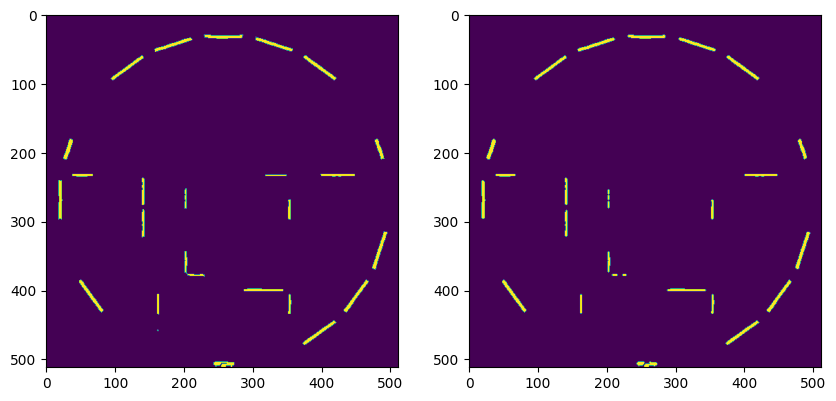

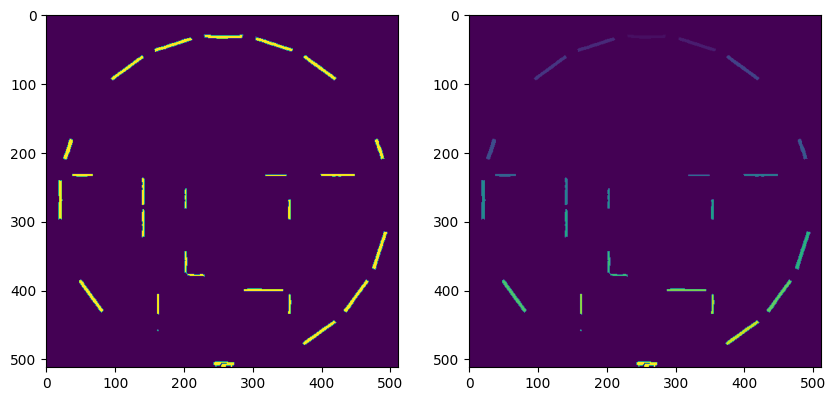

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [240]:
closes = post.open_opereation(post.name_dic['closes']['mask'],show=True,kernel_size=3)
post.split_islands(post.name_dic['closes']['mask'],show=True,kernel_size=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from utils.module.UNet_v2 import *
from utils.module.datasets import Image_dataset
from utils.module.train import Train
from utils.module.postprocessing import Postprocessing
from torchvision.transforms import v2
import numpy as np

dataset = Image_dataset(r'data\train_image',r'data\train_mask',transform=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%load_ext autoreload
%autoreload 2
from utils.module.UNet_v2 import *
from utils.module.datasets import Image_dataset
from utils.module.train import Train
from utils.module.postprocessing import Postprocessing
from torchvision.transforms import v2
import numpy as np

dataset = Image_dataset(r'data\train_image',r'data\train_mask',transform=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
image = np.load('./result/picture/image.npy')
masks = np.load('./result/picture/masks.npy')
image = torch.from_numpy(image)
masks = torch.from_numpy(masks)

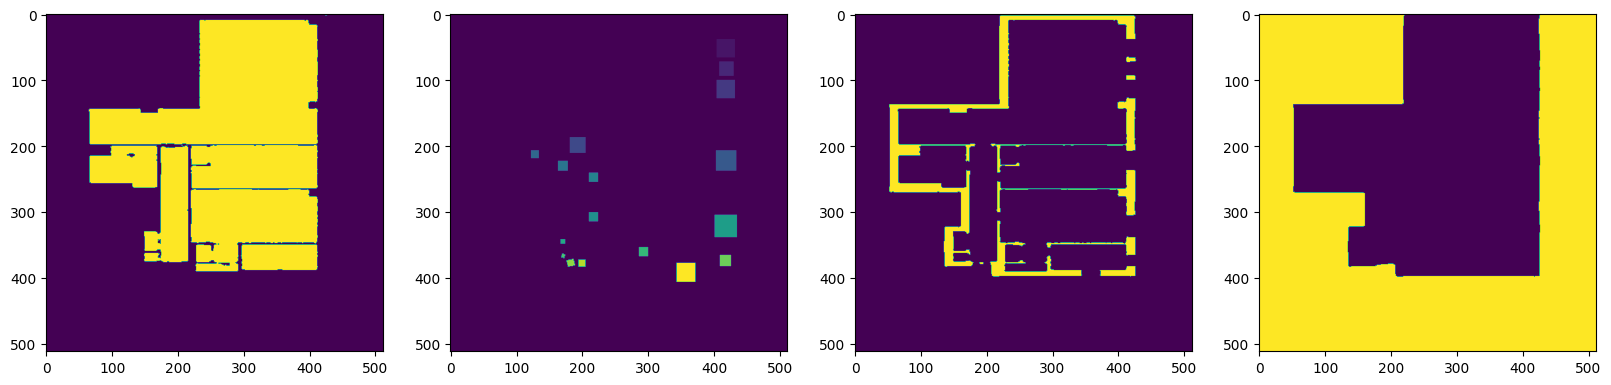

In [205]:
post = Postprocessing(image,masks)
post.segment_mask(show=True)

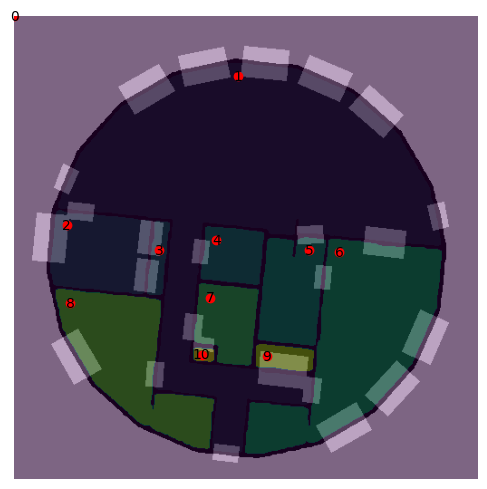

{0: [0, 0],
 1: [247, 66],
 2: [58, 231],
 3: [160, 259],
 4: [223, 247],
 5: [326, 259],
 6: [359, 261],
 7: [216, 311],
 8: [62, 317],
 9: [279, 376],
 10: [207, 374]}

In [220]:
post.label_island(show=True)

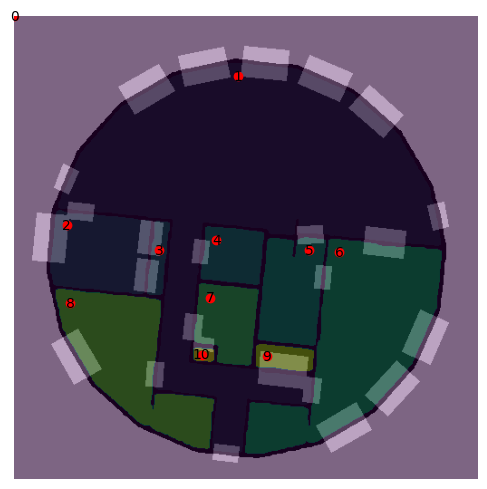

{0: {'position': [0, 0], 'connect': {1, 2, 6, 8}},
 1: {'position': [247, 66], 'connect': {0, 2, 4, 5, 6, 7, 8, 9}},
 2: {'position': [58, 231], 'connect': {0, 1, 3, 6}},
 3: {'position': [160, 259], 'connect': {2}},
 4: {'position': [223, 247], 'connect': {1}},
 5: {'position': [326, 259], 'connect': {1, 6}},
 6: {'position': [359, 261], 'connect': {0, 1, 2, 5}},
 7: {'position': [216, 311], 'connect': {1, 10}},
 8: {'position': [62, 317], 'connect': {0, 1}},
 9: {'position': [279, 376], 'connect': {1}},
 10: {'position': [207, 374], 'connect': {7}}}

In [221]:
post.find_connected_islands(show=True)